In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
df = pd.read_csv('SAheart.csv')
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [4]:
df.shape

(462, 10)

In [5]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


In [6]:
df.quantile(np.arange(0,1,0.1))

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0.0,101.0,0.000,0.980,6.740,13.0,14.700,0.000,15.0
0.1,118.0,0.000,2.510,13.713,41.0,21.142,0.000,18.0
0.2,122.0,0.000,3.104,17.930,46.0,22.320,0.000,28.0
0.3,126.0,0.400,3.543,21.145,49.0,23.633,1.385,34.0
0.4,130.0,1.024,3.950,23.874,51.0,24.804,3.248,40.0
0.5,134.0,2.000,4.340,26.115,53.0,25.805,7.510,45.0
0.6,138.0,3.436,4.890,28.082,56.0,26.706,11.830,49.0
0.7,144.0,4.500,5.457,30.057,58.0,27.807,19.298,54.0
0.8,154.0,6.156,6.138,32.472,61.0,29.114,27.770,58.0
0.9,166.0,9.090,7.383,35.352,65.0,30.965,47.510,61.0


In [7]:
df.describe(include=['O'])

,famhist,chd
count,462,462
unique,2,2
top,Absent,No
freq,270,302


In [8]:
df['chd'].value_counts()

No    302
Si    160
Name: chd, dtype: int64

In [9]:
df['famhist'].value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [10]:
pd.crosstab(index = df['famhist'], columns = df["chd"])

chd,No,Si
famhist,,
Absent,206,64
Present,96,96


([<matplotlib.axis.XTick at 0x1a2096ad68>,
 <a list of 2 Text xticklabel objects>)

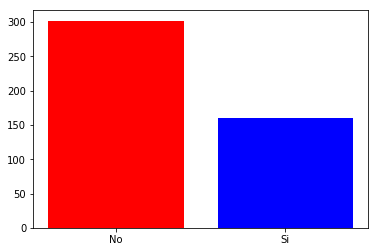

In [11]:
chd_no = df['chd'].value_counts()[0]
chd_yes = df['chd'].value_counts()[1]
np.arange(2)
plt.bar([0,1], [chd_no, chd_yes], color = ["red", "blue"])
plt.xticks([0,1], ["No","Si"])

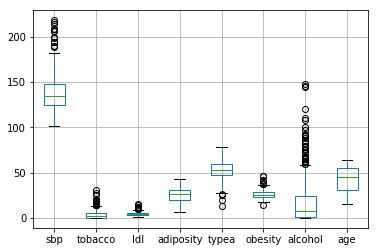

In [12]:
df.boxplot()

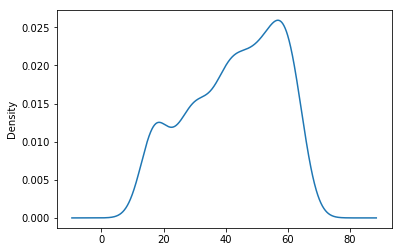

In [13]:
df['age'].plot(kind='density')

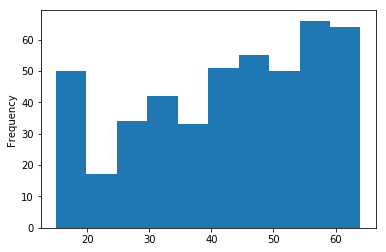

In [14]:
df['age'].plot(kind='hist')

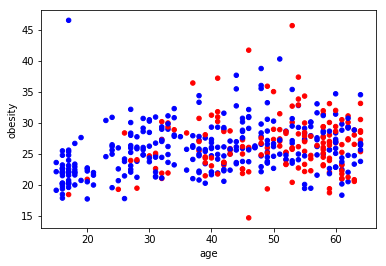

In [15]:
df.plot(kind="scatter", x = "age", y = "obesity", c = [ "red" if x=="Si" else "blue" for x in df["chd"]])

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


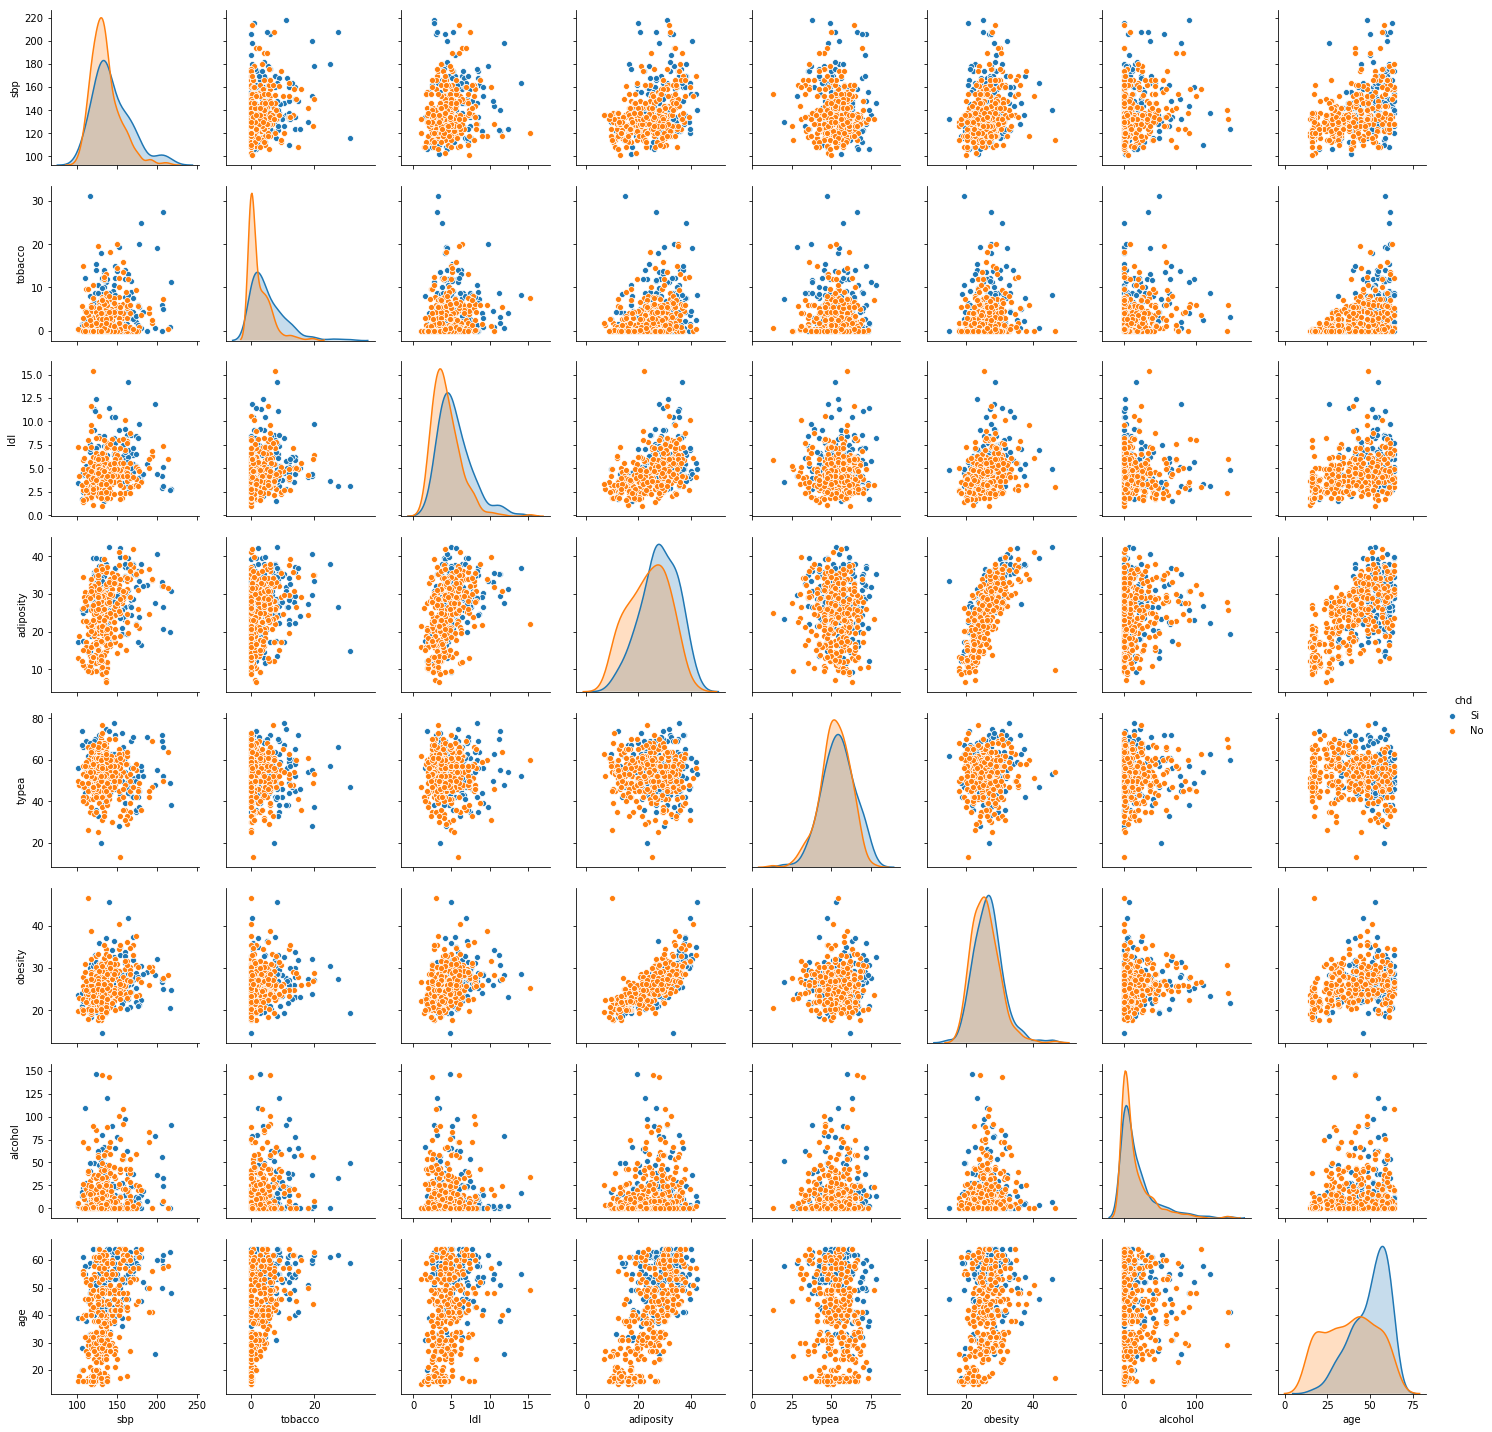

In [16]:
sns.pairplot(df, hue="chd", size=2.5)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


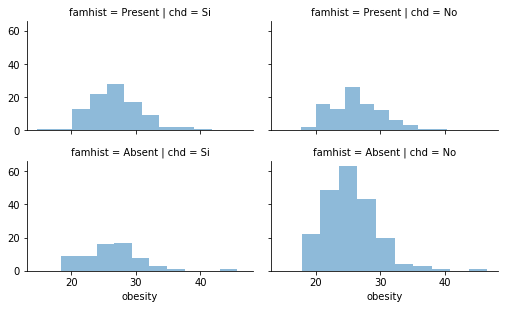

In [17]:
grid = sns.FacetGrid(df, col='chd', row='famhist', size=2.2, aspect=1.6)
grid.map(plt.hist, 'obesity', alpha=.5)
grid.add_legend();

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


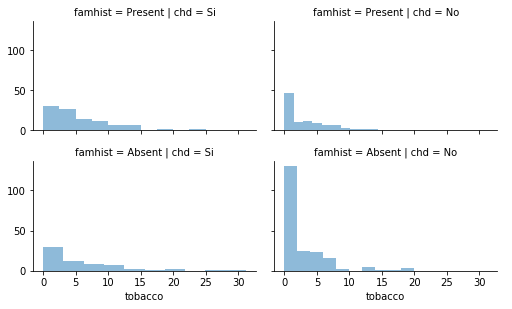

In [18]:
grid = sns.FacetGrid(df, col='chd', row='famhist', size=2.2, aspect=1.6)
grid.map(plt.hist, 'tobacco', alpha=.5)
grid.add_legend();

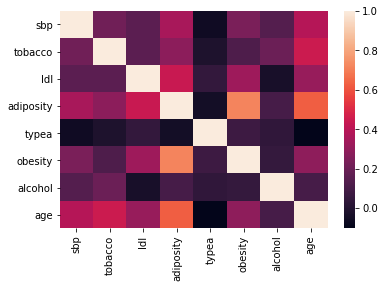

In [19]:
sns.heatmap(df.corr())

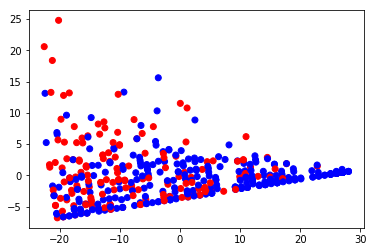

In [20]:
pca = PCA(n_components=2)
cmps = pca.fit_transform(df[['tobacco','age']])
plt.scatter(cmps[:,0], cmps[:,1], c=[ "red" if x=="Si" else "blue" for x in df["chd"]])